In [3]:
# load libraries
library(randomForest)
library(ggplot2)
library(reshape)
library(pastecs)
library(ggpubr)
library(psycho)
library(tidyverse)
library(lme4)
library(MuMIn)
require(car)
require(MASS)

Warning message:
"package 'randomForest' was built under R version 3.5.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Warning message:
"package 'reshape' was built under R version 3.5.3"Warning message:
"package 'pastecs' was built under R version 3.5.3"Warning message:
"package 'ggpubr' was built under R version 3.5.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.5.3"
Attaching package: 'magrittr'

The following object is masked from 'package:pastecs':

    extract

Warning message:
"package 'psycho' was built under R version 3.5.3"code for methods in class "Rcpp_model_bernoulli" was not checked for suspicious field assignments (recommended package 'codetools' not available?)
code for methods in class "Rcpp_model_bernoulli" was not che

## Working on the by-day data

In [7]:
# load data
filename = 'test- by day - aggregated.csv'
data_by_day <- read.csv(filename)

In [8]:
all_by_day <-ggplot(data_by_day, aes(y=Percentage.Correct, x=Sequential.Day,group=Unique_Animal_ID,colour=Unique_Animal_ID)) + 
    theme(legend.position="none")+
    geom_line()
    

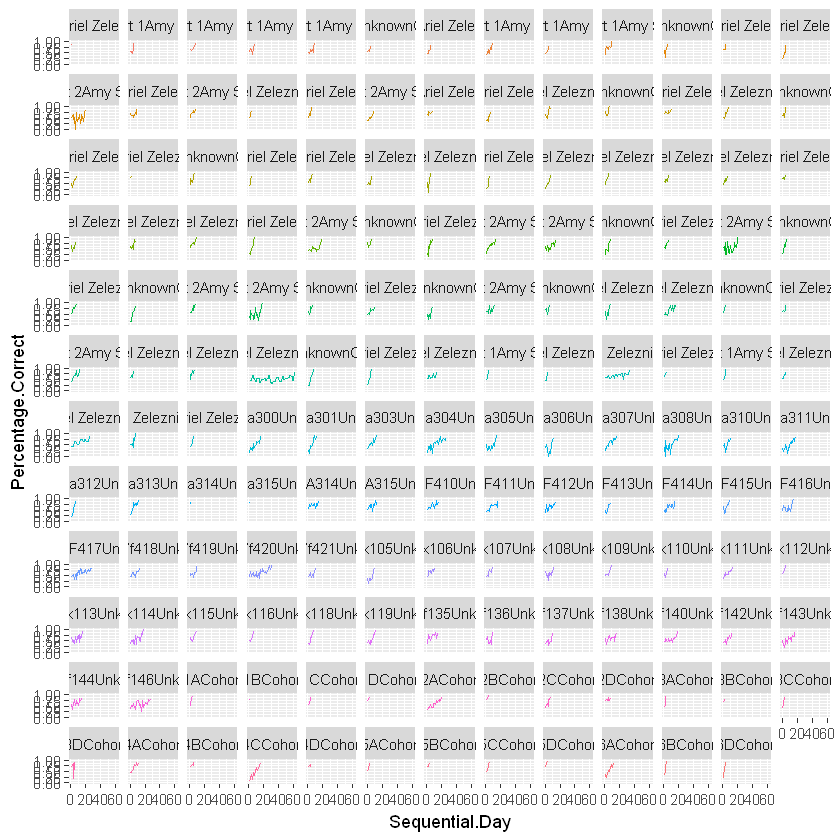

In [9]:
all_by_day_facet <- all_by_day + facet_wrap(vars(Unique_Animal_ID))
all_by_day_facet

In [11]:
ggsave(paste(filename,' by day graphs.png'), height = 30, width = 30)

In [13]:
experimenter_check <-ggplot(data_by_day, aes(y=Percentage.Correct, x=Sequential.Day,group=Unique_Animal_ID,colour=Experimenter)) + 
    theme(legend.position="none")+
    geom_line()

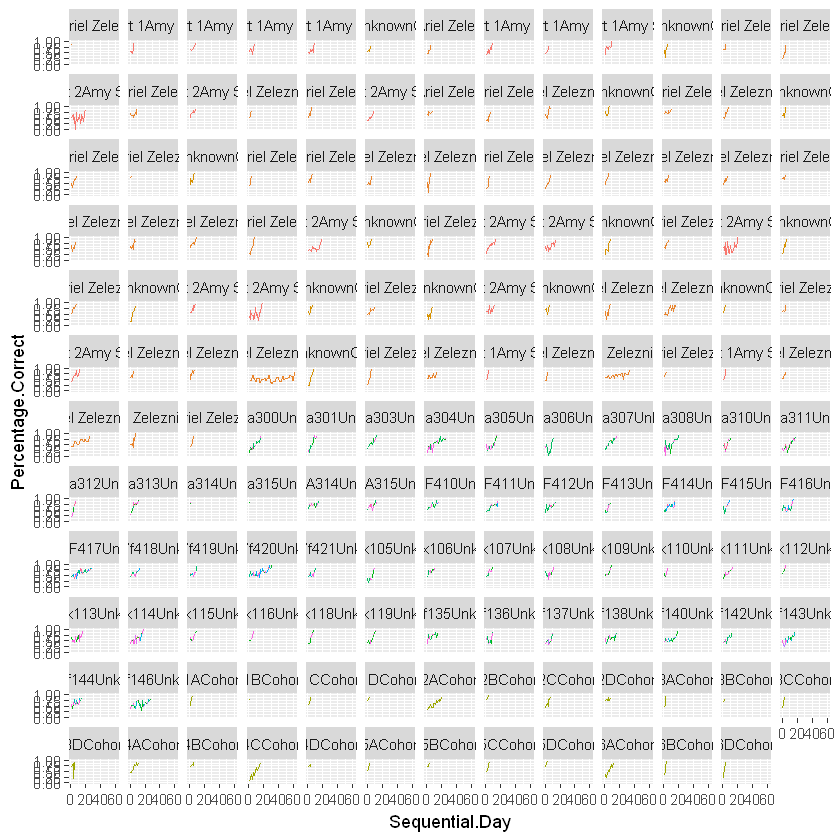

In [14]:
experimenter_facet <- experimenter_check + facet_wrap(vars(Unique_Animal_ID))
experimenter_facet
ggsave(paste(filename,' by experimenter.png'), height = 30, width = 30)

 ## Working on the aggregated data

In [15]:
filename = 'test- aggregated.csv'
data <- read.csv(filename)

In [16]:
colnames(data)

[1] "X"                   "Adj_TOD"             "Adj_TOD_hour"       
 [4] "Age..months."        "Animal_Id"           "Chamber"            
 [7] "Correction.Trials"   "Database"            "Date"               
[10] "Experimenter"        "Genotype"            "Initiation.Time"    
[13] "Lab.site"            "Percentage.Correct"  "S_Plus"             
[16] "Schedule"            "Sex"                 "Single.Group"       
[19] "Stimulus"            "Strain"              "Total.Trials.No.CTs"
[22] "Unique_Animal_ID"    "Unique_Cohort"

In [17]:
# how many animals do we have to work with?
nrow(data)

[1] 155

In [18]:
# some descriptive statistics
ct_summary <- stat.desc(data$Correction.Trials)
round(ct_summary,2)

nbr.val     nbr.null       nbr.na          min          max        range 
      155.00         0.00         0.00        10.00      2064.00      2054.00 
         sum       median         mean      SE.mean CI.mean.0.95          var 
    35393.00       182.00       228.34        16.92        33.43     44393.78 
     std.dev     coef.var 
      210.70         0.92

In [19]:
# graphing out stuff before analysis
ct_plot <- ggplot(data, aes(y=Correction.Trials, x=Unique_Cohort,colour=Experimenter)) +
        geom_boxplot() + geom_point() +
        theme(text = element_text(size=10),axis.text.x = element_blank(), axis.title.x = element_blank())

trials_plot <- ggplot(data, aes(y=Total.Trials.No.CTs, x=Unique_Cohort,colour=Experimenter)) +
        geom_boxplot() + geom_point() +
        theme(text = element_text(size=10),axis.text.x = element_blank(), axis.title.x = element_blank())

initime_plot <- ggplot(data, aes(y=Initiation.Time, x=Unique_Cohort,colour=Experimenter)) +
        geom_boxplot() + geom_point() +
        theme(text = element_text(size=10),axis.text.x = element_blank(), axis.title.x = element_blank())

age_plot <- ggplot(data, aes(y=Age..months., x=Unique_Cohort,colour=Experimenter)) +
        geom_boxplot() + geom_point() +
        theme(text = element_text(size=10),axis.text.x = element_blank(), axis.title.x = element_blank())

adjtod_plot <- ggplot(data, aes(y=Adj_TOD, x=Unique_Cohort,colour=Experimenter)) +
        geom_boxplot() + geom_point() +
        theme(text = element_text(size=7),axis.text.x = element_text(angle=15, hjust=1))

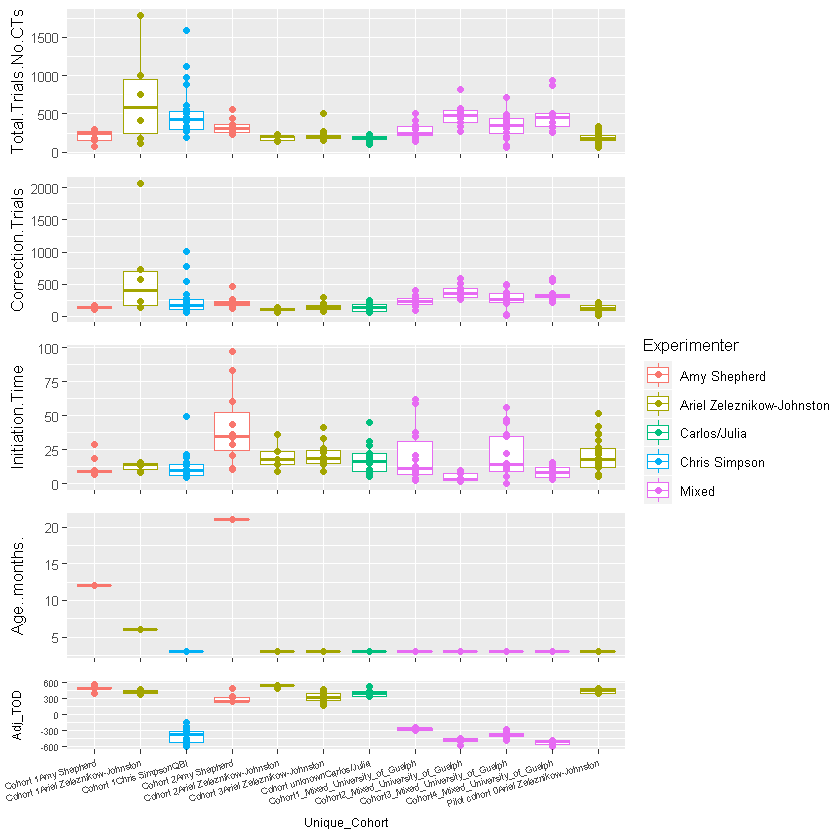

In [20]:
plots <- ggarrange(trials_plot,ct_plot,initime_plot,age_plot,adjtod_plot,
                  ncol = 1, nrow = 5, align = "v", common.legend = TRUE, legend = "right")
plots

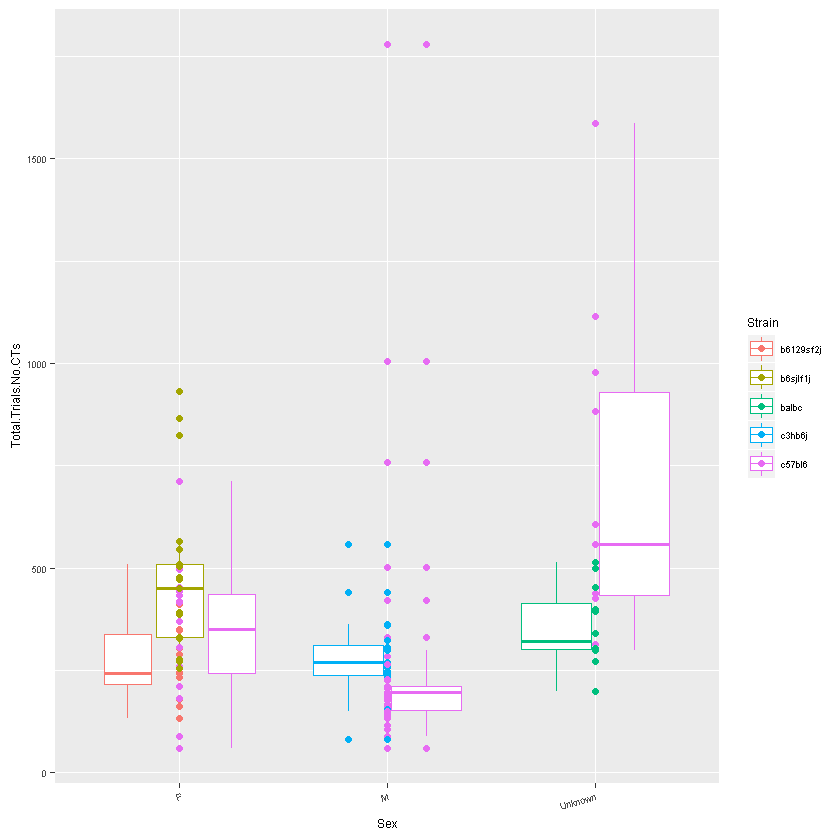

In [24]:
strain_plot <- ggplot(data, aes(y=Total.Trials.No.CTs, x=Sex,colour=Strain)) +
        geom_boxplot() + geom_point() +
        theme(text = element_text(size=7),axis.text.x = element_text(angle=15, hjust=1))
strain_plot

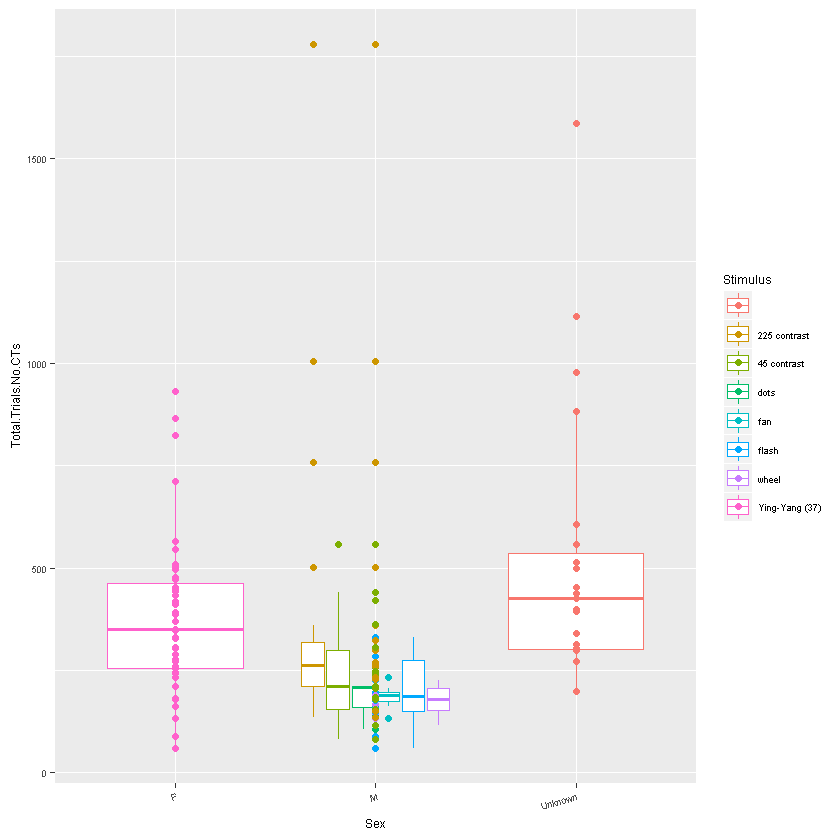

In [26]:
stimulus_plot <- ggplot(data, aes(y=Total.Trials.No.CTs, x=Sex,colour=Stimulus)) +
        geom_boxplot() + geom_point() +
        theme(text = element_text(size=7),axis.text.x = element_text(angle=15, hjust=1))
stimulus_plot